# TASK-3 SALES PREDCTION
---------------------------------------------------
A.MOHAMED AABIDH

## Importing the necessary modules and packages for the classification 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import seaborn as sns

## Importing the dataset 

In [2]:
df_sales=pd.read_csv('Advertising.csv')

In [3]:
df_sales

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


-------
## Exploring the dataset and performing cleaning and preprocessing 
---------

In [4]:
df_sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df_sales.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [6]:
df_sales.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
df_sales.columns=['Unnamed','TV','Radio','Newspaper','Sales']

In [8]:
df_sales

,Unnamed,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [9]:
final_df=df_sales.drop('Unnamed',axis=1)

In [10]:
final_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


-------
## DATA VISUALIZATION 
------

C:\Users\Abdul Rahman\AppData\Local\Temp\ipykernel_10724\1093065995.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df["TV"]);


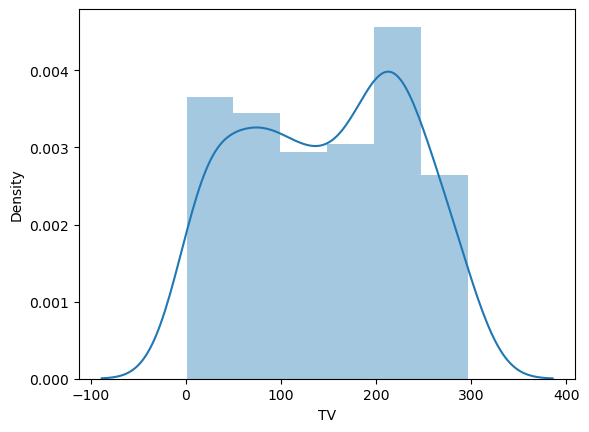

In [11]:
sns.distplot(final_df["TV"]);

C:\Users\Abdul Rahman\AppData\Local\Temp\ipykernel_10724\2641757347.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df["Radio"]);


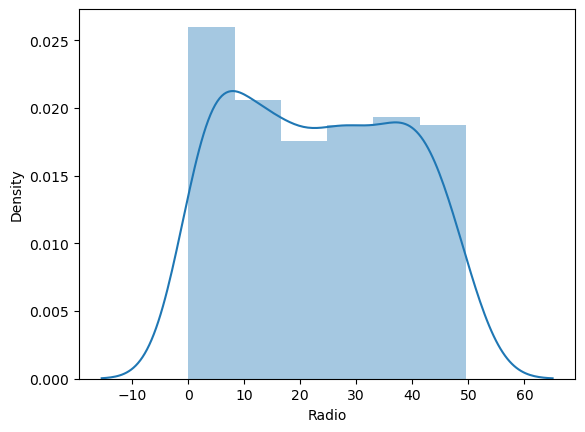

In [12]:
sns.distplot(final_df["Radio"]);

C:\Users\Abdul Rahman\AppData\Local\Temp\ipykernel_10724\2926023233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df["Newspaper"]);


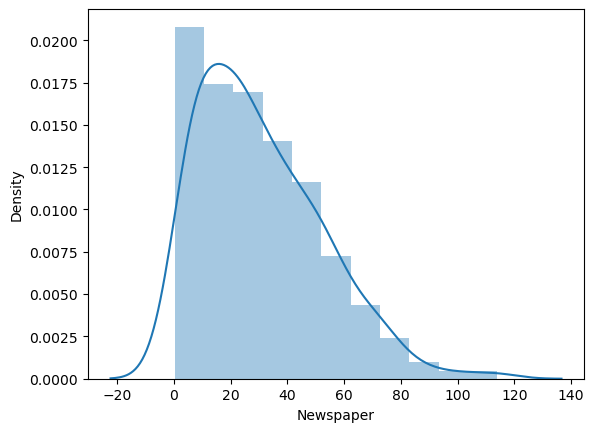

In [13]:
sns.distplot(final_df["Newspaper"]);

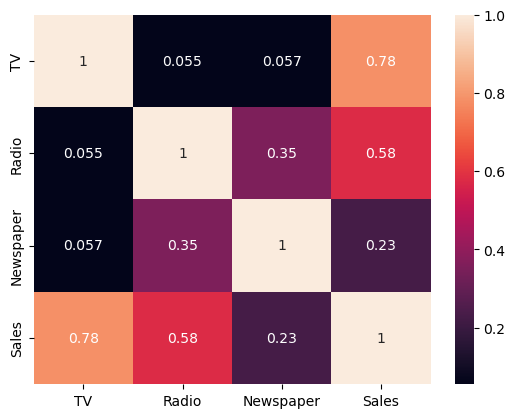

In [14]:
corr=final_df.corr()
sns.heatmap(corr, annot=True);

---
## SPLITTING THE DATA INTO TRAINING AND TEST DATAS
---

In [15]:
x=final_df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
y=final_df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

---
## USING MACHINE LEARNING ALGORITHM - LINEAR REGRESSION 
---

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [19]:
model=LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [21]:
ypred=model.predict(x_test)
ypred

array([22.11633349, 17.80153492, 23.82259991, 10.04517819, 21.66658741,
       18.62560375,  8.17610803,  5.20243085, 15.78692017, 21.11295176,
       12.44148724, 13.77091141, 18.43211903, 18.9198498 ,  7.76174142,
       10.20858908, 18.34326884, 20.960886  , 10.11770769,  9.12289579,
        8.39140489, 15.2490773 ,  6.60068812, 19.71002596, 12.07888079,
        7.34859664, 20.69976953, 19.53216331, 24.7581928 ,  9.32213533,
       11.72125718,  8.10456767,  9.79953182, 17.18539336, 14.13266909,
       21.22631595, 23.39689786, 15.27844926, 18.52932546, 12.7541636 ,
        6.62804317,  7.16651985, 19.44948437, 20.40394841, 16.63027588,
       18.44166209, 14.91168527, 10.09881507,  9.71301388, 12.17582607,
       17.24046967, 14.23502814, 18.15250322, 18.07508829, 19.25582871,
       12.81942523, 14.40210583, 12.03611603,  4.51248997,  9.12671688])

In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(ypred,y_test)*100


89.20705465596635

C:\Users\Abdul Rahman\AppData\Local\Temp\ipykernel_10724\1100475968.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(final_df['Sales'], hist=False, color="r", label="Actual Value")
C:\Users\Abdul Rahman\AppData\Local\Temp\ipykernel_10724\1100475968.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

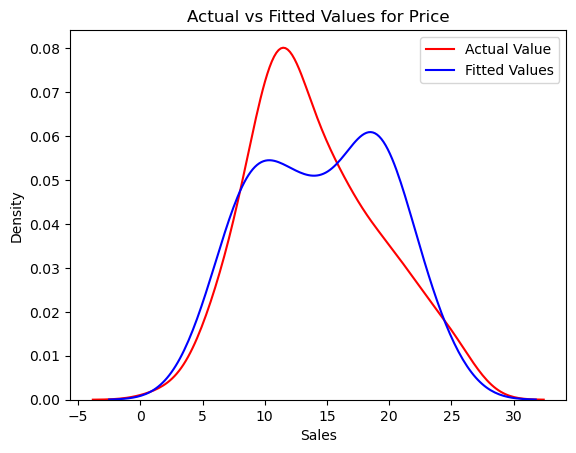

In [24]:
figsize=(30, 25)

ax1 = sns.distplot(final_df['Sales'], hist=False, color="r", label="Actual Value")
sns.distplot(ypred, hist=False, color="b", label="Fitted Values" , ax=ax1);

plt.title('Actual vs Fitted Values for Price')
plt.legend()
plt.show()

## Conclusion
An 88.63% accuracy for a linear regression model is quite good. Based on this model, we can conclude that the TV advertisement spending has a significant impact on the Sales figures, with a positive correlation between the two variables. Radio advertisement spending also has a moderate positive correlation with Sales, while the correlation between Newspaper advertisement spending and Sales is weak.